In [9]:
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

n = MLP(3, [4, 4, 1])

xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [10]:
learning_rate = 0.1
for k in range(20):
  # forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))

  for p in n.parameters():
    p.grad = 0.0
  
  # backward pass
  loss.backward()
  
  # update
  for p in n.parameters():
    p.data -= learning_rate * p.grad
  
  print(k, loss.data)

0 6.790388653625614
1 4.130440153578385
2 4.590114155726098
3 5.316788149695332
4 4.239457050257246
5 5.080857475394145
6 3.8212593361539886
7 4.074312558165095
8 3.9503863687190366
9 0.9960166725195316
10 0.6468660223553332
11 0.3122927915204049
12 0.23110303439389182
13 0.19202560746091188
14 0.16318444077327307
15 0.14087135744665563
16 0.1231336685940731
17 0.10874731165951339
18 0.09689283063511936
19 0.08699626136877102


In [11]:
ypred

[Value(data=0.8773493875538113),
 Value(data=-0.8655893978909508),
 Value(data=-0.8247983688177074),
 Value(data=0.8477132077063391)]

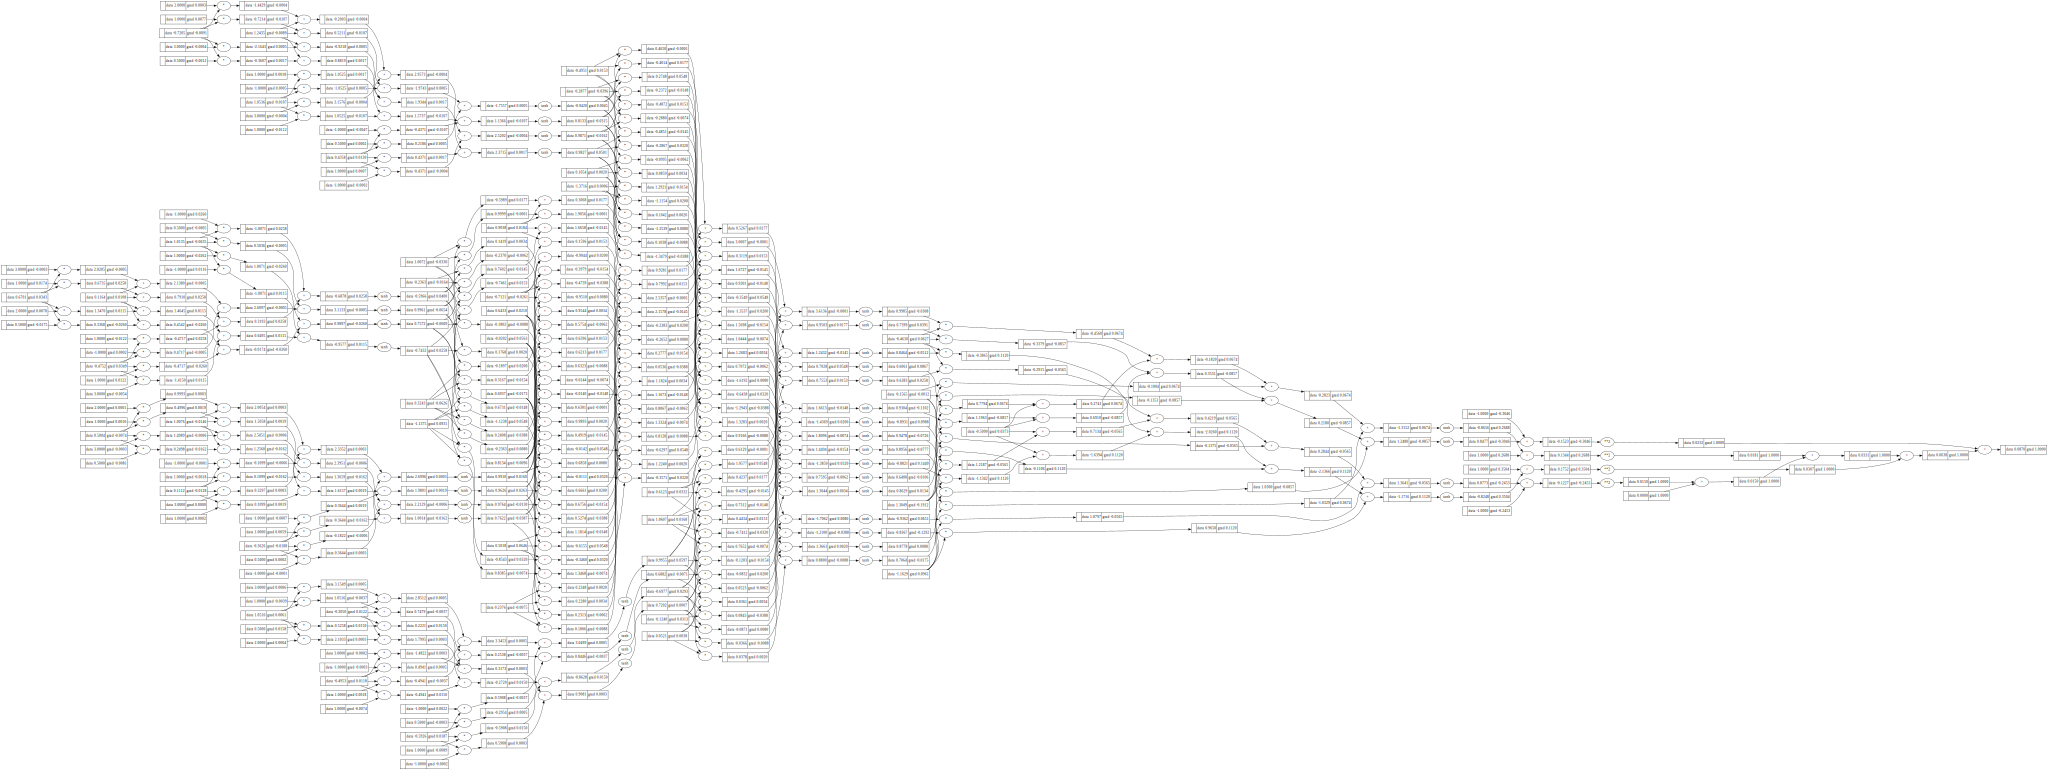

In [13]:
import trace
trace.draw_dot(loss)